#**Workforce Callout Analysis and Employee Performance Optimization**

This analysis aims to explore patterns and trends in workforce callouts, identify employees with high callout frequencies, and provide insights into potential areas for improvement or intervention. By examining the distribution of callouts over time, job titles, shifts, and individual employees, we can gain a deeper understanding of the factors influencing callout behavior and take steps to optimize workforce management and support employee well-being.

## Dataset Description
1. **EmplID - Employee Name:** Unique identifier and name of the employee.
2. **Employee - EmplID** - Job Title: Employee ID, job title, and possibly additional employment details.
3. **Terminal:** Location or workstation where the employee works.
4. **Workforce Callout Number:** Unique identifier for each absenteeism incident.
5. **Call out Reasons:** Reasons provided by employees for their absence.
6. **Related Employee:** Information about any related individuals involved in the absenteeism incident.
7. **Shift:** Employee's assigned work schedule or shift.
8. **Date Created:** Date and time when the absenteeism incident was recorded.

## Importing Required Libraries

In [25]:
# Import the NumPy library for numerical operations
import numpy as np

# Import the Pandas library for data manipulation and analysis
import pandas as pd

# Import the Matplotlib library for data visualization
import matplotlib.pyplot as plt

In [26]:
# Read the CSV file "/content/Terminal_Workforce_Callout_Reporting.csv" into a Pandas DataFrame
df = pd.read_csv("/content/Terminal_Workforce_Callout_Reporting.csv", encoding='latin1')

In [27]:
# Display the first few rows of the DataFrame using the head() method
df.head()

,EmplID - Employee Name,Employee - EmplID - Job Title,Terminal,Workforce Callout Number,Call out Reasons,Related Employee,Shift,Date Created
0,Larry Perkins,Bus Attendant,New York Ave,+1 (202) 714-2350,Unscheduled Sick Leave,31036,AM and PM,03-17-2024 10:46 PM
1,"Poston, Britannia",Motor Vehicle Operator,New York Ave,+1 (240) 640-9687,Unscheduled Sick Leave,41820,AM and PM,03-17-2024 08:28 PM
2,"Dicks, Elois F",BUS ATTENDANT,New York Ave,+1 (202) 446-8697,Paid Family Leave,68058,AM and PM,03-17-2024 04:51 PM
3,"Dupree, Christy",BUS ATTENDANT,New York Ave,+1 (202) 427-1159,Unscheduled Sick Leave,41452,PM,03-15-2024 02:35 PM
4,Bianca Brooks,MOTOR VEHICLE OPERATOR,New York Ave,+1 (202) 227-8884,Unscheduled Sick Leave,127345,PM,03-15-2024 12:00 PM


In [28]:
# Display the last few rows of the DataFrame using the tail() method
df.tail()

,EmplID - Employee Name,Employee - EmplID - Job Title,Terminal,Workforce Callout Number,Call out Reasons,Related Employee,Shift,Date Created
6283,"Brawner, Karen S",BUS ATTENDANT,New York Ave,+1 (202) 710-6059,Paid Family Leave,113159,AM and PM,09-19-2022 07:36 PM
6284,"Thompson, Tiffany D",Bus Attendant,New York Ave,+1 (202) 304-3248,Annual Leave - Unscheduled,101589,PM,09-19-2022 01:46 PM
6285,"Thompson, Tiffany D",Bus Attendant,New York Ave,+1 (202) 304-3248,Late to Work,101589,PM,09-19-2022 01:41 PM
6286,"Johnson, Rolisha A",Bus Attendant,New York Ave,+1 (202) 907-6935,Paid Family Leave,111881,AM and PM,09-19-2022 04:02 AM
6287,"Mack, Chakeena R",MOTOR VEHICLE OPERATOR,New York Ave,+1 (202) 716-1334,Annual Leave - Unscheduled,41484,AM and PM,09-18-2022 07:30 PM


In [29]:
# Display a random sample of 5 rows from the DataFrame using the sample() method
df.sample(5)

,EmplID - Employee Name,Employee - EmplID - Job Title,Terminal,Workforce Callout Number,Call out Reasons,Related Employee,Shift,Date Created
3635,"Cooper, Lakisha P",MOTOR VEHICLE OPERATOR,New York Ave,+1 (202) 294-0812,Unscheduled Sick Leave,56872,PM,06-29-2023 10:05 AM
166,Montay Butler,Bus Attendant,New York Ave,+1 (202) 748-6356,Unscheduled Sick Leave,120998,AM and PM,03-05-2024 04:53 AM
2468,"Bullock, Monica",BUS ATTENDANT,New York Ave,+1 (202) 975-8941,Unscheduled Sick Leave,42536,AM,09-26-2023 04:50 AM
601,"Binns, Paulette",BUS ATTENDANT,New York Ave,+1 (202) 740-1037,Unscheduled Sick Leave,42232,AM,02-06-2024 05:42 AM
1856,"Grayson, Rhonda Y",MOTOR VEHICLE OPERATOR,New York Ave,+1 (240) 535-1157,Unscheduled Sick Leave,41783,PM,11-09-2023 11:41 AM


In [30]:
# shape of the DataFrame using the shape attribute
df.shape

(6288, 8)

In [31]:
#Concise summary of the DataFrame using the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6288 entries, 0 to 6287
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmplID - Employee Name         6288 non-null   object
 1   Employee - EmplID - Job Title  6288 non-null   object
 2   Terminal                       6288 non-null   object
 3   Workforce Callout Number       6283 non-null   object
 4   Call out Reasons               6288 non-null   object
 5   Related Employee               6288 non-null   int64 
 6   Shift                          6288 non-null   object
 7   Date Created                   6288 non-null   object
dtypes: int64(1), object(7)
memory usage: 393.1+ KB


In [32]:
# Count the number of missing values in each column using the isnull() and sum() methods
df.isnull().sum()

EmplID - Employee Name           0
Employee - EmplID - Job Title    0
Terminal                         0
Workforce Callout Number         5
Call out Reasons                 0
Related Employee                 0
Shift                            0
Date Created                     0
dtype: int64

For "Workforce Callout Number" only 5 missing values are present.

In [9]:
# Count the number of duplicate rows in the DataFrame using the duplicated() and sum() methods
df.duplicated().sum()

29

In [10]:
# Generate descriptive statistics for each numerical column in the DataFrame using the describe() method
df.describe()

,Related Employee
count,6288.00000
mean,74845.96215
std,35002.46263
min,31036.00000
25%,41958.00000
50%,56872.00000
75%,109679.00000
max,132007.00000


<Axes: title={'center': 'Percentage of Missing Values per Feature'}, xlabel='Features', ylabel='Percentage of Missing Values'>

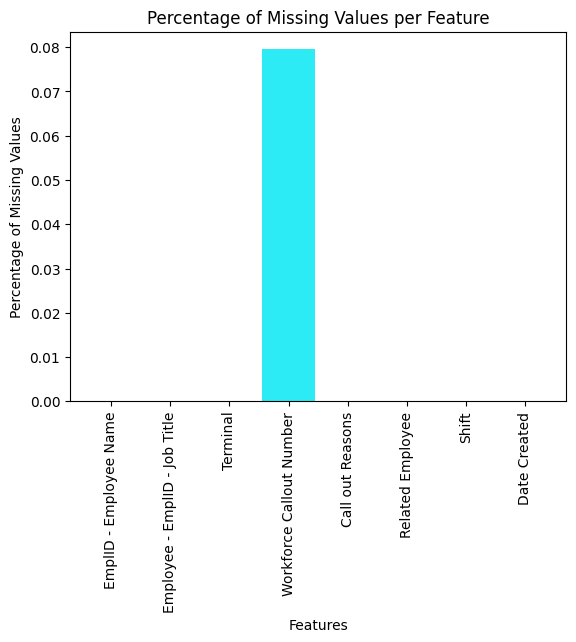

In [11]:
# Calculate the percentage of missing values for each column
x = df.isnull().sum()
percent_missing = x / len(df) * 100

# Plot the missing values as a bar chart
percent_missing.plot(kind="bar",
                    stacked=True,
                    title="Percentage of Missing Values per Feature",
                    xlabel="Features",
                    ylabel="Percentage of Missing Values",
                    color='#2cebf4',
                    width=0.9)

In [33]:
# Get the column names of the DataFrame using the columns attribute
df.columns

Index(['EmplID - Employee Name', 'Employee - EmplID - Job Title', 'Terminal',
       'Workforce Callout Number', 'Call out Reasons', 'Related Employee',
       'Shift', 'Date Created'],
      dtype='object')

# **Data preprocessing**

In [34]:
# Convert the 'Date Created' column to datetime objects using pd.to_datetime()
df['Date Created'] = pd.to_datetime(df['Date Created'])
# Extract the year and month from the 'Date Created' column
df['Year'] = df['Date Created'].dt.year
df['Month'] = df['Date Created'].dt.month

In [35]:
#Checking the Dtype after converting to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6288 entries, 0 to 6287
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   EmplID - Employee Name         6288 non-null   object        
 1   Employee - EmplID - Job Title  6288 non-null   object        
 2   Terminal                       6288 non-null   object        
 3   Workforce Callout Number       6283 non-null   object        
 4   Call out Reasons               6288 non-null   object        
 5   Related Employee               6288 non-null   int64         
 6   Shift                          6288 non-null   object        
 7   Date Created                   6288 non-null   datetime64[ns]
 8   Year                           6288 non-null   int64         
 9   Month                          6288 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 491.4+ KB


Now we are removing irrelevant call-out reason related rows from our dataframe for quality analysis

In [36]:
# Define the list of relevant call-out reasons
relevant_reasons = [
    "Unscheduled Sick Leave",
    "Annual Leave - Unscheduled",
    "Unscheduled sick leave for 3 or more days"
]

# Filter the DataFrame to keep only rows with relevant call-out reasons
df = df[df['Call out Reasons'].isin(relevant_reasons)]

# Now filtered_df contains only the rows with relevant call-out reasons

In [37]:
# Remove duplicate rows from the DataFrame using drop_duplicates() and inplace=True
df.drop_duplicates(inplace=True)

In [38]:
#After dropping duplicate values checking the duplicate count
df.duplicated().sum()

0

In [39]:
#Only for Workforce Callout Number column 5 missing values are present so dropping those rows for accurate analysis
df.dropna(subset='Workforce Callout Number',inplace=True)

In [40]:
#After dropping null values checking again to verify the null value count
df.isnull().sum()

EmplID - Employee Name           0
Employee - EmplID - Job Title    0
Terminal                         0
Workforce Callout Number         0
Call out Reasons                 0
Related Employee                 0
Shift                            0
Date Created                     0
Year                             0
Month                            0
dtype: int64

In [41]:
#Checking the 'Employee - EmplID - Job Title' column as there are repeated categories are present
df['Employee - EmplID - Job Title']

0                Bus Attendant
1       Motor Vehicle Operator
3                BUS ATTENDANT
4       MOTOR VEHICLE OPERATOR
5                Bus Attendant
                 ...          
6272             BUS ATTENDANT
6276             Bus Attendant
6280    MOTOR VEHICLE OPERATOR
6284             Bus Attendant
6287    MOTOR VEHICLE OPERATOR
Name: Employee - EmplID - Job Title, Length: 5190, dtype: object

To rectify and enhance the 'Employee - EmplID - Job Title' column categories according to the provided information (where "Bus Attendant" and "Motor Vehicle Operator" are the main unique categories), we'll standardize the formatting by converting all values to title case. This will ensure consistency and avoid confusion in our analysis.

In [20]:
# Convert 'Employee - EmplID - Job Title' column to lowercase and remove leading/trailing whitespace
df['Employee - EmplID - Job Title'] = df['Employee - EmplID - Job Title'].str.lower().str.strip()

# Display unique values to identify inconsistencies
print(df['Employee - EmplID - Job Title'].unique())


['bus attendant' 'motor vehicle operator']


# Univariate Analysis

### Call-out Reason Analysis

In [21]:
# Count the occurrences of each unique value in the 'Call out Reasons' column using value_counts()
df['Call out Reasons'].value_counts()

Unscheduled Sick Leave                       4119
Annual Leave - Unscheduled                    826
Unscheduled sick leave for 3 or more days     245
Name: Call out Reasons, dtype: int64

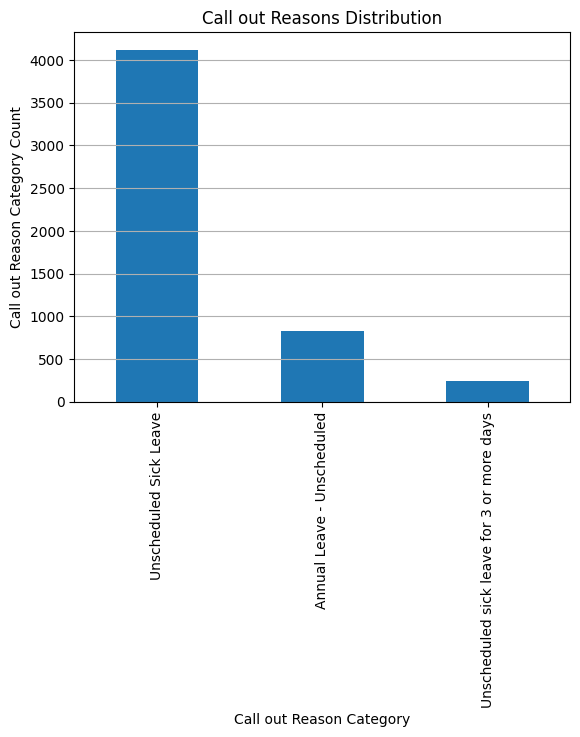

In [22]:
# Count the occurrences of each unique value in the 'Call out Reasons' column using value_counts()
df['Call out Reasons'].value_counts().plot(kind="bar")

# Set the title and labels for the chart
plt.title("Call out Reasons Distribution")
plt.xlabel("Call out Reason Category")
plt.ylabel("Call out Reason Category Count")

# Add a grid to the chart for clarity
plt.grid(axis='y')

### **Insight:**

The Call Out Reason Category bar chart reveals that Unscheduled Sick Leave has a significantly higher count compared to other reasons. This finding suggests that a substantial number of employees are calling out sick without prior notice.

### Job-Title Distribution

In [23]:
# Count the occurrences of each unique value in the 'Employee - EmplID - Job Title' column using value_counts()
df['Employee - EmplID - Job Title'].value_counts()

bus attendant             3414
motor vehicle operator    1776
Name: Employee - EmplID - Job Title, dtype: int64

Text(0.5, 1.0, 'Job Title Distributions')

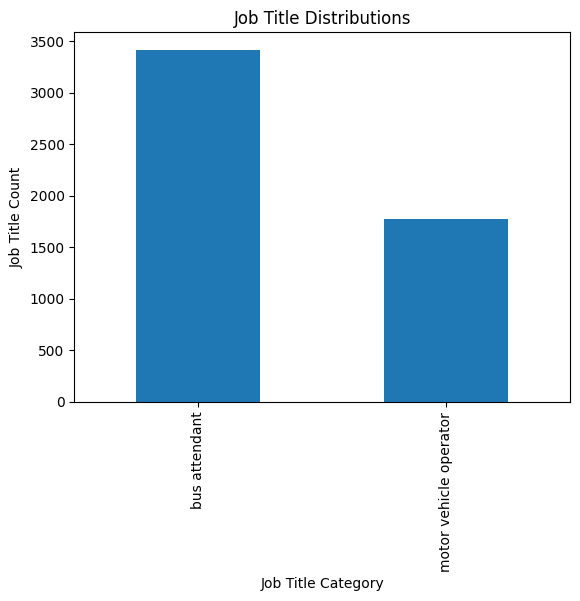

In [24]:
# Count the occurrences of each unique value in the 'Employee - EmplID - Job Title' column using value_counts()
df['Employee - EmplID - Job Title'].value_counts().plot(kind="bar")

# Set the title and labels for the chart
plt.xlabel("Job Title Category")
plt.ylabel("Job Title Count")
plt.title("Job Title Distributions")

### **Insight:**

The job title distribution shows a significant disparity between the number of Bus Attendants and Motor Vehicle Operators. Bus Attendants make up the majority of the workforce, with over twice the number of employees compared to Motor Vehicle Operators.

### Shift Distribution

In [ ]:
# Count the occurrences of each unique value in the 'Shift' column using value_counts()
df['Shift'].value_counts()

AM and PM    3018
PM           1480
AM            692
Name: Shift, dtype: int64

Text(0, 0.5, 'Number of Employees')

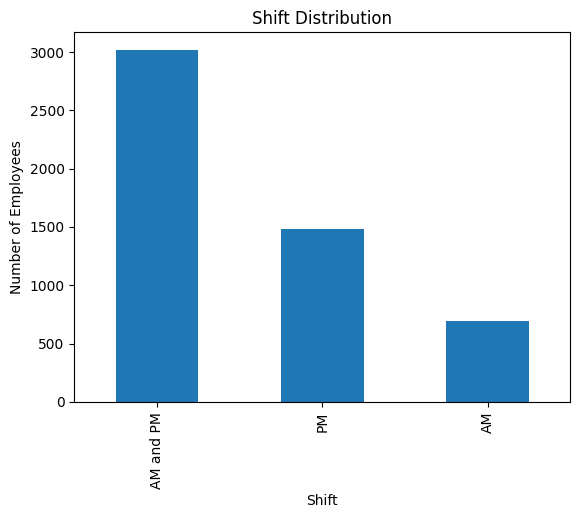

In [ ]:
# Count the occurrences of each unique value in the 'Shift' column using value_counts()
df['Shift'].value_counts().plot(kind="bar")

# Set the title and labels for the chart
plt.title("Shift Distribution")
plt.xlabel("Shift")
plt.ylabel("Number of Employees")

### **Insight:**

The bar chart reveals a striking preference for the AM and PM mixed shift, with a significantly higher count compared to the single PM and single AM shifts.

## Bi-Variate Analysis

### Employees with the Highest Number of Call-Outs

In [42]:
# Calculate the frequency of call-outs for each employee
Callout_count = df.groupby("EmplID - Employee Name")["Workforce Callout Number"].count().reset_index()

# Sort the results in descending order of call-out count
Callout_count.sort_values("Workforce Callout Number", ascending=False, inplace=True)

# Rename the columns for clarity
Callout_count.columns = ['EmplID', 'Callout Count']

# Display the top 10 employees with the highest call-out counts
Callout_count.head(10)

,EmplID,Callout Count
89,"Poston, Britannia",188
62,"Johnson, Rolisha A",176
104,"Thompson, Tiffany D",153
13,"Binns, Paulette",125
100,"Stevens, Jermaine B",121
66,Kevin Williams,118
52,"Hopkins, Latoya D",115
37,"Eleby, Cynthia E",114
6,Artease Pimble,114
115,"Williams, Genevieve K",103


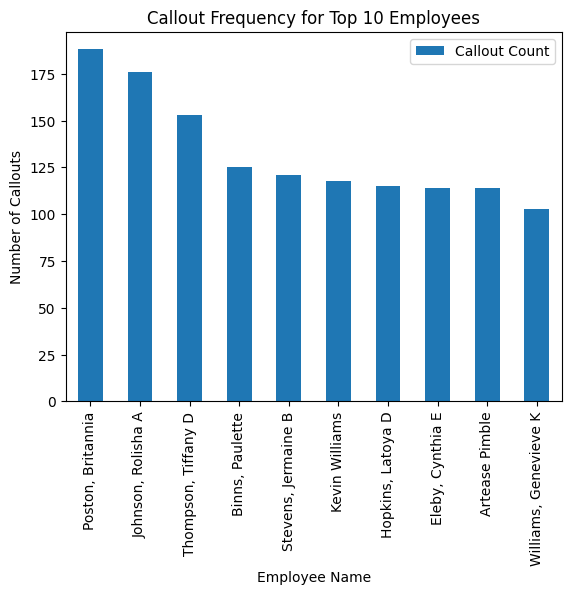

In [43]:
# Calculate the frequency of call-outs for each employee
Callout_count = df.groupby("EmplID - Employee Name")["Workforce Callout Number"].count().reset_index()

# Sort the results in descending order of call-out count
Callout_count.sort_values("Workforce Callout Number", ascending=False, inplace=True)

# Rename the columns for clarity
Callout_count.columns = ['EmplID', 'Callout Count']

# Select the top 10 employees with the highest call-out counts
Top_10_Callout_count = Callout_count.head(10)

# Create a bar chart to visualize the call-out frequency for the top 10 employees
Top_10_Callout_count.plot(x='EmplID', y='Callout Count', kind='bar')

# Set the title and labels for the chart
plt.title("Callout Frequency for Top 10 Employees")
plt.xlabel("Employee Name")
plt.ylabel("Number of Callouts")

# Display the chart
plt.show()

### **Inference:**

The data reveals notable differences in call-out counts among various employees, indicating potential variations in absenteeism rates across the workforce. Employees like Britannia Poston, Rolisha A Johnson, and Tiffany D Thompson have significantly higher call-out counts compared to others, suggesting they may face recurring absenteeism issues or chronic reasons for absence.

### **Possible Causes:**

Chronic Absenteeism Patterns:

Employees with consistently high call-out counts, such as Britannia Poston and Rolisha A Johnson, may be experiencing ongoing absenteeism issues, possibly due to health concerns, personal circumstances, or job-related factors.

Job-related Stress or Dissatisfaction:

High call-out counts among certain employees could be indicative of job-related stress or dissatisfaction. Factors such as workload, job responsibilities, or workplace environment may contribute to absenteeism.

Support Needs:

Employees with frequent call-outs, such as Tiffany D Thompson or Latoya D Hopkins, may require additional support or accommodations. Addressing underlying issues and providing necessary support can help improve attendance and well-being.

Absenteeism Trends:

Analyzing call-out counts over time can reveal trends and patterns, such as seasonal variations or specific days of the week with higher absenteeism rates. Understanding these trends can help in developing targeted interventions.

### **Recommendations:**

Supportive Interventions:

Implement targeted interventions to address the specific needs of employees with high call-out counts. This could include providing counseling, flexible work arrangements, or wellness programs to support employee well-being.

Communication and Engagement:

Foster open communication channels and promote employee engagement to address underlying issues contributing to absenteeism. Regular feedback sessions and employee surveys can help identify areas for improvement.

Performance Management:

Review performance management practices to ensure fair and consistent treatment of employees. Providing recognition for attendance and addressing performance issues promptly can help mitigate absenteeism.

Workplace Policies:

Review and update workplace policies and procedures to ensure they support employee well-being and attendance. This could include policies related to sick leave, remote work, and flexible scheduling.

### Related Employee Impact

In [46]:
# Group by related employee and count the number of call-outs for each related employee
related_employee_impact = df.groupby('Related Employee')['Workforce Callout Number'].count().sort_values(ascending=False)
related_employee_impact.head(10)

Related Employee
41820     188
111881    176
101589    153
42232     125
42381     121
123310    118
108814    115
112095    114
103558    114
42219     103
Name: Workforce Callout Number, dtype: int64

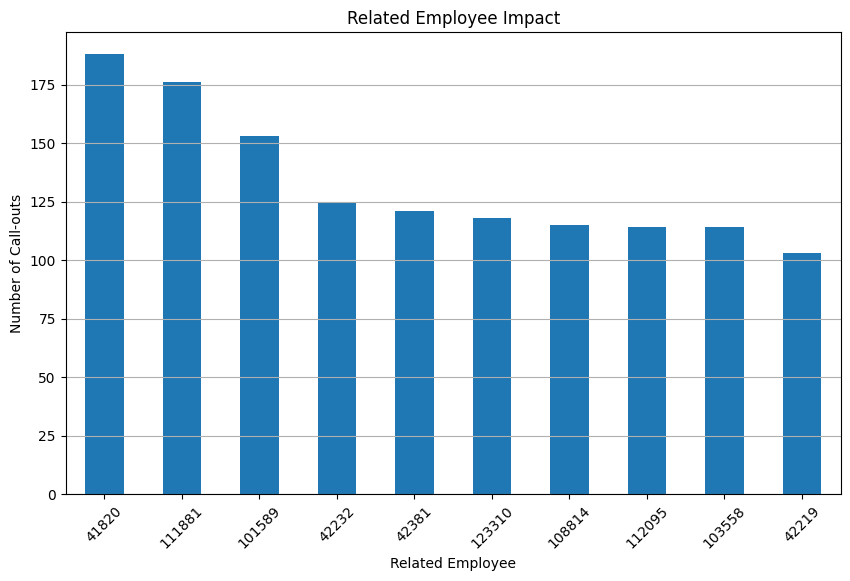

In [ ]:
# Group by related employee and count the number of call-outs for each related employee
related_employee_impact = df.groupby('Related Employee')['Workforce Callout Number'].count().sort_values(ascending=False)

# Plot the impact of related employees on absenteeism
plt.figure(figsize=(10, 6))
related_employee_impact.head(10).plot(kind='bar')
plt.title('Related Employee Impact')
plt.xlabel('Related Employee')
plt.ylabel('Number of Call-outs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



The above bar plot shows how many times related employees are involved in absenteeism. If someone's name appears a lot in the plot, it means they're often connected to others' absences. This helps us see how one person's absence affects their colleagues' attendance. It's a useful way to understand teamwork and how absences can impact the whole team's performance.

### **Inference:**

The data indicates a significant impact of related employees on absenteeism, with certain individuals being associated with a high number of call-outs. Employees with the IDs 41820, 111881, and 101589 have the highest call-out counts, suggesting their involvement in multiple absenteeism incidents.

### **Possible Causes:**

Collaborative Work Environment:

Employees may be closely connected to others in their work environment, leading to their involvement in each other's absenteeism incidents.

Team Dynamics:

Certain teams or departments may exhibit higher absenteeism rates, potentially due to shared responsibilities or work conditions.

Supervisory Relationships:

Employees with supervisory roles or responsibilities may be more likely to be involved in absenteeism incidents of their subordinates.

Workload Distribution:

Uneven workload distribution or workload dependencies among employees could result in absenteeism incidents affecting multiple individuals.

### **Recommendations:**

Identify Root Causes:

Conduct a detailed analysis to understand the underlying reasons for the high involvement of related employees in absenteeism incidents.

Address Work Environment Factors:

Take measures to improve work environment conditions, promote teamwork, and foster positive relationships among employees.

Implement Supportive Policies:

Implement policies and procedures that support employee well-being, such as flexible work arrangements, employee assistance programs, and wellness initiatives.

Provide Leadership Training:

Provide training and support to supervisors and managers to effectively manage absenteeism and promote employee engagement and attendance.

### Call-out Frequency over Time

In [ ]:
# Convert 'Date Created' column to datetime
df['Date Created'] = pd.to_datetime(df['Date Created'])

# Extract year and month from the 'Date Created' column
df['Year'] = df['Date Created'].dt.year
df['Month'] = df['Date Created'].dt.month

# Group by year and month and count the number of call-outs
monthly_callouts = df.groupby(['Year', 'Month'])['Workforce Callout Number'].count()

# Display the monthly call-out counts
print(monthly_callouts)

Year  Month
2022  9         30
      10       162
      11       185
      12       203
2023  1        247
      2        219
      3        237
      4        217
      5        284
      6        339
      7        323
      8        307
      9        363
      10       346
      11       328
      12       371
2024  1        475
      2        370
      3        184
Name: Workforce Callout Number, dtype: int64


<ipython-input-68-a28c15d873d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Created'] = pd.to_datetime(df['Date Created'])
<ipython-input-68-a28c15d873d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date Created'].dt.year
<ipython-input-68-a28c15d873d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

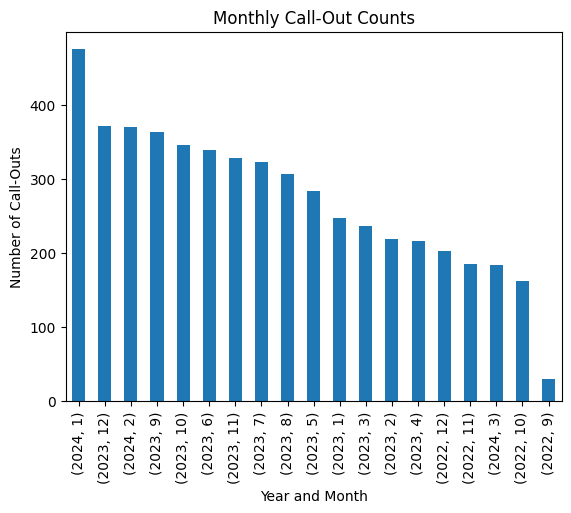

In [ ]:
# Plot the monthly call-out counts
monthly_callouts.sort_values(ascending=False).plot(kind='bar')

# Set the title and labels for the chart
plt.title("Monthly Call-Out Counts")
plt.xlabel("Year and Month")
plt.ylabel("Number of Call-Outs")



# Display the chart
plt.show()


### **Inference:**

The analysis unveils fluctuating absenteeism patterns over time, with varying frequencies across different months and years.

### **Trends:**

Overall Trend:

An upward trend in absenteeism is evident from September 2022 to January 2024, with occasional fluctuations.

Seasonal Patterns:

Peaks and troughs suggest possible seasonal influences, with notable spikes observed during October-November 2022, June-September 2023, and January 2024.

Monthly Fluctuations:

Certain months exhibit higher absenteeism rates, particularly September 2023 and January 2024, with 363 and 475 call-outs respectively.

### **Possible Causes:**

Seasonal Factors:

Holidays, weather conditions, or peak business periods may contribute to absenteeism fluctuations.

Workload Variations:

Changes in workload or operational demands could impact absenteeism rates.

Employee Well-being:

Factors such as stress, illness, or burnout may influence absenteeism trends over time.

### **Recommendations:**

Wellness Programs:

Implement tailored wellness initiatives targeting the unique needs of bus attendants and motor vehicle operators to improve their health and well-being.

Flexible Policies:

Introduce flexible work arrangements specifically designed for bus attendants and motor vehicle operators to accommodate their schedules and reduce absenteeism during peak periods.

Performance Monitoring:

Regularly monitor absenteeism trends among bus attendants and motor vehicle operators to identify patterns and implement targeted interventions to maintain productivity and employee engagement.

### Shift-wise Absenteeism:

In [48]:
# Group by shift and count the number of call-outs for each shift
shift_absenteeism = df.groupby('Shift')['Workforce Callout Number'].count().sort_values(ascending=False)
shift_absenteeism

Shift
AM and PM    3018
PM           1480
AM            692
Name: Workforce Callout Number, dtype: int64

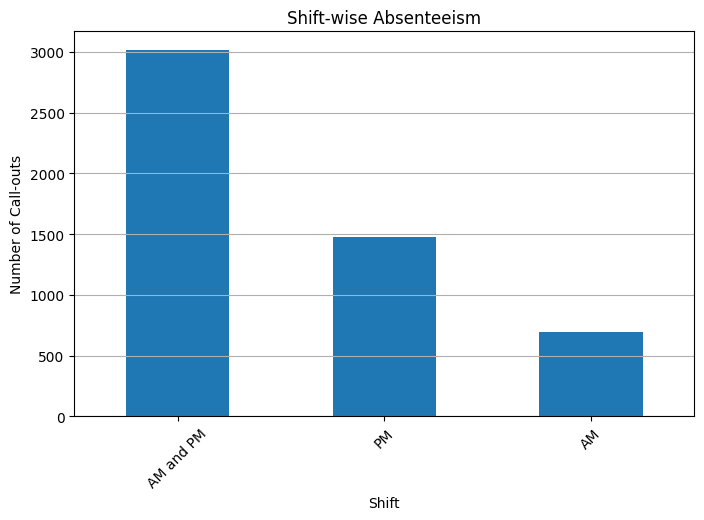

In [49]:
# Group by shift and count the number of call-outs for each shift
shift_absenteeism = df.groupby('Shift')['Workforce Callout Number'].count().sort_values(ascending=False)

# Plot the shift-wise absenteeism
plt.figure(figsize=(8, 5))
shift_absenteeism.plot(kind='bar')
plt.title('Shift-wise Absenteeism')
plt.xlabel('Shift')
plt.ylabel('Number of Call-outs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### **Inference:**

The analysis of shift-wise absenteeism highlights significant disparities in call-out frequency across different shifts.

### **Insights:**

Dominance of AM and PM Shifts:

The combined "AM and PM" shift exhibits the highest absenteeism rate, with a total of 3,018 call-outs. This suggests that employees assigned to both morning and afternoon shifts are more prone to absenteeism compared to those assigned to either the morning or afternoon shift exclusively.

Lower Absenteeism in PM Shift:

The "PM" shift records a moderate absenteeism rate, with 1,480 call-outs. While lower than the combined AM and PM shift, this still indicates a notable level of absenteeism among employees working exclusively during the afternoon hours.

Lowest Absenteeism in AM Shift:

The "AM" shift demonstrates the lowest absenteeism rate, with only 692 call-outs. This suggests that employees assigned to the morning shift experience relatively fewer absenteeism incidents compared to their counterparts on other shifts.

### **Recommendation:**

Further Investigation:

Conduct a detailed analysis to identify underlying factors contributing to the discrepancies in absenteeism rates across different shifts. Factors such as workload distribution, shift scheduling, and employee preferences should be explored to better understand the reasons behind the observed patterns.

Targeted Interventions:

Implement targeted interventions aimed at reducing absenteeism among employees assigned to the AM and PM shifts, as they exhibit the highest absenteeism rates. This may involve providing additional support, addressing workload issues, or offering incentives to improve attendance.

Shift Planning Optimization:

Review and optimize shift planning processes to ensure a balanced distribution of workload and minimize potential stressors that could contribute to absenteeism. Flexibility in shift scheduling and accommodating employee preferences may also help in improving attendance rates.

# **Overall Insight and Recommendation:-**


## **Insights:**

1. Unscheduled sick leave is predominant, indicating a need for health-related support programs and absenteeism management strategies.

2. There's a substantial difference between Bus Attendants and Motor Vehicle Operators, warranting a review of workload distribution and job satisfaction among these roles.

3. AM and PM mixed shift preference signals potential scheduling issues or workload distribution imbalances, requiring optimization and flexibility in shift planning.

4. Employees like Britannia Poston, Rolisha A Johnson, and Tiffany D Thompson exhibit high absenteeism rates, suggesting the need for personalized support interventions and performance management strategies.

5. Identifying root causes behind high involvement in absenteeism incidents and fostering a supportive work environment can mitigate absenteeism rates among related employees.

6. Seasonal and monthly fluctuations in absenteeism call for tailored wellness programs, flexible policies, and performance monitoring to address varying workload and employee well-being concerns.

7. Further investigation into factors contributing to different shift absenteeism rates is necessary, with targeted interventions focused on optimizing shift planning and addressing potential stressors.

## **Recommendations:**

1. Implement tailored wellness programs to support employee health and well-being, addressing prevalent absence reasons like unscheduled sick leave.

2. Review workload distribution and job satisfaction among Bus Attendants and Motor Vehicle Operators to ensure equitable treatment and promote engagement.

3. Optimize shift planning processes to address disparities in absenteeism rates across different shifts, ensuring flexibility and balance in scheduling.

4. Provide personalized support and performance management interventions for employees with high absenteeism rates, addressing underlying issues and promoting accountability.

5. Foster a supportive work environment and open communication channels to mitigate absenteeism's impact, emphasizing teamwork and collaboration.

6. Continuously monitor absenteeism trends and adjust strategies accordingly to maintain workforce productivity and well-being.